# Recognizing Human Activities using Smartphones
## Classification on Smartphone-Based Recognition of Human Activities and Postural Transitions Dataset

### Preliminary Exploratory Data Analysis & Methods

In [2]:
# First, we will load required packages
library(repr)
library(knitr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(GGally)

# Then, set the seed
set.seed(1)

Warning message:
“package ‘knitr’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1

### I. Demonstrate that the dataset can be read from the web into R

In [3]:
# Data source: http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions#
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip"

# Specifying destination where file should be saved
destfile <- "data/localfile.zip"

# Apply download.file function 
download.file(url, destfile)

unzip ("data/localfile.zip", exdir = "data/")

### II. Clean and wrangle data into a tidy format

In [4]:
# create a vector of features to use for col names of training data
#X1 represents the row number
#X2 is the features 
features_table <- read_delim("data/UCI HAR Dataset/features.txt", delim = " ", col_names = FALSE)
glimpse(features_table)
features_vector <- dplyr::pull(features_table, 'X2')
features_vector_sub <- gsub("-", "_", features_vector)

features_vector_sub <- gsub("[()]", "", features_vector_sub)
glimpse(features_vector_sub)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_character()
)



Rows: 561
Columns: 2
$ X1 <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…
$ X2 <chr> "tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z", "tB…
 chr [1:561] "tBodyAcc_mean_X" "tBodyAcc_mean_Y" "tBodyAcc_mean_Z" ...


In [5]:
# create a table of activity labels to add such a variable as a column into the training set data frame.
label_col_name_vec <- c('activity_label')
y_training_label <- read_delim("data/UCI HAR Dataset/train/y_train.txt", delim = " ", col_names = label_col_name_vec) 

y_testing_label <- read_delim("data/UCI HAR Dataset/test/y_test.txt", delim = " ", col_names = label_col_name_vec)

Parsed with column specification:
cols(
  activity_label = col_double()
)

Parsed with column specification:
cols(
  activity_label = col_double()
)



In [6]:
# read feature values 
x_training_data <- read_delim("data/UCI HAR Dataset/train/X_train.txt", delim = " ", col_names = features_vector_sub)

x_testing_data <- read_delim("data/UCI HAR Dataset/test/X_test.txt", delim = " ", col_names = features_vector_sub)

Warning message:
“Duplicated column names deduplicated: 'fBodyAcc_bandsEnergy_1,8' => 'fBodyAcc_bandsEnergy_1,8_1' [317], 'fBodyAcc_bandsEnergy_9,16' => 'fBodyAcc_bandsEnergy_9,16_1' [318], 'fBodyAcc_bandsEnergy_17,24' => 'fBodyAcc_bandsEnergy_17,24_1' [319], 'fBodyAcc_bandsEnergy_25,32' => 'fBodyAcc_bandsEnergy_25,32_1' [320], 'fBodyAcc_bandsEnergy_33,40' => 'fBodyAcc_bandsEnergy_33,40_1' [321], 'fBodyAcc_bandsEnergy_41,48' => 'fBodyAcc_bandsEnergy_41,48_1' [322], 'fBodyAcc_bandsEnergy_49,56' => 'fBodyAcc_bandsEnergy_49,56_1' [323], 'fBodyAcc_bandsEnergy_57,64' => 'fBodyAcc_bandsEnergy_57,64_1' [324], 'fBodyAcc_bandsEnergy_1,16' => 'fBodyAcc_bandsEnergy_1,16_1' [325], 'fBodyAcc_bandsEnergy_17,32' => 'fBodyAcc_bandsEnergy_17,32_1' [326], 'fBodyAcc_bandsEnergy_33,48' => 'fBodyAcc_bandsEnergy_33,48_1' [327], 'fBodyAcc_bandsEnergy_49,64' => 'fBodyAcc_bandsEnergy_49,64_1' [328], 'fBodyAcc_bandsEnergy_1,24' => 'fBodyAcc_bandsEnergy_1,24_1' [329], 'fBodyAcc_bandsEnergy_25,48' => 'fBodyAcc_ba

In [7]:
# add activity label column to data
training_set_all <- bind_cols(x_training_data, y_training_label)
tail(training_set_all)

testing_set_all <- bind_cols(x_testing_data, y_testing_label)
tail(testing_set_all)

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2.3796648e-001,-1.0878070e-003,-1.4832590e-001,-2.1894876e-001,-1.2926748e-002,1.7001874e-001,-3.0959929e-001,-4.1392263e-002,2.0745436e-001,2.1079544e-001,⋯,-5.9248831e-001,-8.6723607e-001,3.5277575e-001,-6.0481685e-001,-7.7478312e-001,7.3014246e-001,-7.9727183e-001,2.3499575e-001,4.8907023e-002,2
2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,3.9904850e-002,7.7078081e-002,-2.8230064e-001,4.3615631e-002,6.0410083e-002,2.1079544e-001,⋯,-5.8843274e-001,-8.8032443e-001,-1.9043686e-001,8.2971842e-001,2.0697215e-001,-4.2561858e-001,-7.9188305e-001,2.3860439e-001,4.9819139e-002,2
2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,4.8162805e-003,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,8.0585116e-002,1.1744028e-001,⋯,-3.9073832e-001,-6.8074445e-001,6.4906712e-002,8.7567905e-001,-8.7903279e-001,4.0021936e-001,-7.7183960e-001,2.5267595e-001,5.0052558e-002,2
2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,3.3258449e-001,4.3998772e-002,⋯,2.5145333e-002,-3.0402936e-001,5.2805928e-002,-2.6672437e-001,8.6440401e-001,7.0116882e-001,-7.7913261e-001,2.4914484e-001,4.0811188e-002,2
2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,3.1947326e-001,1.0170184e-001,⋯,6.3906883e-002,-3.4431361e-001,-1.0136012e-001,7.0073969e-001,9.3667394e-001,-5.8947895e-001,-7.8518142e-001,2.4643223e-001,2.5339478e-002,2
3.5150347e-001,-1.2423118e-002,-2.0386717e-001,-2.6927044e-001,-8.7211541e-002,1.7740393e-001,-3.7740405e-001,-3.8678063e-002,2.2942952e-001,2.6901269e-001,⋯,-3.8705200e-001,-7.4073820e-001,-2.8008805e-001,-7.7392783e-003,-5.6087594e-002,-6.1695645e-001,-7.8326693e-001,2.4680852e-001,3.6694843e-002,2


tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1.9227459e-001,-3.3642566e-002,-1.0594911e-001,-3.5484079e-001,-9.2504346e-002,-3.1290968e-001,-4.3357927e-001,-8.8741465e-002,-3.3605968e-001,-4.1623509e-002,⋯,-6.2965677e-001,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
3.1015462e-001,-5.3391250e-002,-9.9108716e-002,-2.8786635e-001,-1.4058918e-001,-2.1508773e-001,-3.5608315e-001,-1.4877483e-001,-2.3205733e-001,1.8536146e-001,⋯,-3.7627777e-001,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
3.6338465e-001,-3.9214016e-002,-1.0591509e-001,-3.0538795e-001,2.8147742e-002,-1.9637291e-001,-3.7353982e-001,-3.0036042e-002,-2.7023668e-001,1.8536146e-001,⋯,-3.2041786e-001,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
3.4996609e-001,3.0077442e-002,-1.1578796e-001,-3.2963808e-001,-4.2142894e-002,-2.5018068e-001,-3.8801695e-001,-1.3325698e-001,-3.4702897e-001,7.4714557e-003,⋯,-1.1885353e-001,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
2.3759383e-001,1.8466870e-002,-9.6498932e-002,-3.2311431e-001,-2.2977539e-001,-2.0757363e-001,-3.9238016e-001,-2.7961019e-001,-2.8947740e-001,7.4714557e-003,⋯,-2.0544513e-001,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
1.5362719e-001,-1.8436506e-002,-1.3701846e-001,-3.3004597e-001,-1.9525335e-001,-1.6433879e-001,-4.3097381e-001,-2.1829465e-001,-2.2993287e-001,-1.1152697e-001,⋯,-7.2237101e-002,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


In [8]:
# combine all the data into one
bothdfs <- rbind(training_set_all, testing_set_all) %>%
      mutate(activity_label = as_factor(activity_label), 
            across(tBodyAcc_mean_X:fBodyBodyGyroJerkMag_skewness, as.numeric)) %>% 
      na.omit()
tail(bothdfs)

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
0.1922746,-0.03364257,-0.10594911,-0.3548408,-0.09250435,-0.3129097,-0.4335793,-0.08874147,-0.3360597,-0.041623509,⋯,-0.6296568,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
0.3101546,-0.05339125,-0.09910872,-0.2878663,-0.14058918,-0.2150877,-0.3560832,-0.14877483,-0.2320573,0.185361460,⋯,-0.3762778,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
0.3633846,-0.03921402,-0.10591509,-0.3053880,0.02814774,-0.1963729,-0.3735398,-0.03003604,-0.2702367,0.185361460,⋯,-0.3204179,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
0.3499661,0.03007744,-0.11578796,-0.3296381,-0.04214289,-0.2501807,-0.3880170,-0.13325698,-0.3470290,0.007471456,⋯,-0.1188535,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
0.2375938,0.01846687,-0.09649893,-0.3231143,-0.22977539,-0.2075736,-0.3923802,-0.27961019,-0.2894774,0.007471456,⋯,-0.2054451,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
0.1536272,-0.01843651,-0.13701846,-0.3300460,-0.19525335,-0.1643388,-0.4309738,-0.21829465,-0.2299329,-0.111526970,⋯,-0.0722371,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


Our dataset is tidy because each row is a single observation, each column is a single variable, and each value is a single cell.

In [9]:
# random spliting of the combined entire dataset into train (75%) and test (25%)
bothdfs_split <- initial_split(bothdfs, prop = 0.75, strata = activity_label)
activity_train <- training(bothdfs_split) 
activity_test <- testing(bothdfs_split) 

In [10]:
#view column/feature names
names(bothdfs)

[1] "tBodyAcc_mean_X"                    "tBodyAcc_mean_Y"                   
  [3] "tBodyAcc_mean_Z"                    "tBodyAcc_std_X"                    
  [5] "tBodyAcc_std_Y"                     "tBodyAcc_std_Z"                    
  [7] "tBodyAcc_mad_X"                     "tBodyAcc_mad_Y"                    
  [9] "tBodyAcc_mad_Z"                     "tBodyAcc_max_X"                    
 [11] "tBodyAcc_max_Y"                     "tBodyAcc_max_Z"                    
 [13] "tBodyAcc_min_X"                     "tBodyAcc_min_Y"                    
 [15] "tBodyAcc_min_Z"                     "tBodyAcc_sma"                      
 [17] "tBodyAcc_energy_X"                  "tBodyAcc_energy_Y"                 
 [19] "tBodyAcc_energy_Z"                  "tBodyAcc_iqr_X"                    
 [21] "tBodyAcc_iqr_Y"                     "tBodyAcc_iqr_Z"                    
 [23] "tBodyAcc_entropy_X"                 "tBodyAcc_entropy_Y"                
 [25] "tBodyAcc_entropy_Z"                 "tBodyAcc_arCoeff_X,1"              
 [27] "tBodyAcc_arCoeff_X,2"               "tBodyAcc_arCoeff_X,3"              
 [29] "tBodyAcc_arCoeff_X,4"               "tBodyAcc_arCoeff_Y,1"              
 [31] "tBodyAcc_arCoeff_Y,2"               "tBodyAcc_arCoeff_Y,3"              
 [33] "tBodyAcc_arCoeff_Y,4"               "tBodyAcc_arCoeff_Z,1"              
 [35] "tBodyAcc_arCoeff_Z,2"               "tBodyAcc_arCoeff_Z,3"              
 [37] "tBodyAcc_arCoeff_Z,4"               "tBodyAcc_correlation_X,Y"          
 [39] "tBodyAcc_correlation_X,Z"           "tBodyAcc_correlation_Y,Z"          
 [41] "tGravityAcc_mean_X"                 "tGravityAcc_mean_Y"                
 [43] "tGravityAcc_mean_Z"                 "tGravityAcc_std_X"                 
 [45] "tGravityAcc_std_Y"                  "tGravityAcc_std_Z"                 
 [47] "tGravityAcc_mad_X"                  "tGravityAcc_mad_Y"                 
 [49] "tGravityAcc_mad_Z"                  "tGravityAcc_max_X"                 
 [51] "tGravityAcc_max_Y"                  "tGravityAcc_max_Z"                 
 [53] "tGravityAcc_min_X"                  "tGravityAcc_min_Y"                 
 [55] "tGravityAcc_min_Z"                  "tGravityAcc_sma"                   
 [57] "tGravityAcc_energy_X"               "tGravityAcc_energy_Y"              
 [59] "tGravityAcc_energy_Z"               "tGravityAcc_iqr_X"                 
 [61] "tGravityAcc_iqr_Y"                  "tGravityAcc_iqr_Z"                 
 [63] "tGravityAcc_entropy_X"              "tGravityAcc_entropy_Y"             
 [65] "tGravityAcc_entropy_Z"              "tGravityAcc_arCoeff_X,1"           
 [67] "tGravityAcc_arCoeff_X,2"            "tGravityAcc_arCoeff_X,3"           
 [69] "tGravityAcc_arCoeff_X,4"            "tGravityAcc_arCoeff_Y,1"           
 [71] "tGravityAcc_arCoeff_Y,2"            "tGravityAcc_arCoeff_Y,3"           
 [73] "tGravityAcc_arCoeff_Y,4"            "tGravityAcc_arCoeff_Z,1"           
 [75] "tGravityAcc_arCoeff_Z,2"            "tGravityAcc_arCoeff_Z,3"           
 [77] "tGravityAcc_arCoeff_Z,4"            "tGravityAcc_correlation_X,Y"       
 [79] "tGravityAcc_correlation_X,Z"        "tGravityAcc_correlation_Y,Z"       
 [81] "tBodyAccJerk_mean_X"                "tBodyAccJerk_mean_Y"               
 [83] "tBodyAccJerk_mean_Z"                "tBodyAccJerk_std_X"                
 [85] "tBodyAccJerk_std_Y"                 "tBodyAccJerk_std_Z"                
 [87] "tBodyAccJerk_mad_X"                 "tBodyAccJerk_mad_Y"                
 [89] "tBodyAccJerk_mad_Z"                 "tBodyAccJerk_max_X"                
 [91] "tBodyAccJerk_max_Y"                 "tBodyAccJerk_max_Z"                
 [93] "tBodyAccJerk_min_X"                 "tBodyAccJerk_min_Y"                
 [95] "tBodyAccJerk_min_Z"                 "tBodyAccJerk_sma"                  
 [97] "tBodyAccJerk_energy_X"              "tBodyAccJerk_energy_Y"             
 [99] "tBodyAccJerk_energy_Z"              "tBodyAccJerk_iqr_X"                
[1

In [66]:
#Determining correlation of variables to choose relevant predictors 
options(repr.matrix.max.cols=150, repr.matrix.max.rows=6)

#features related to acceleration 
#tBodyAcc_mean_X:tBodyAcc_energy_Z
#tBodyAcc_std_Z
relevant_acc_columns <- bothdfs %>% 
    select(tBodyAcc_mean_X:tBodyAcc_min_Z, activity_label)  
relevant_acc_columns 

#features related to angular velocity 
#tBodyGyro_mean_X:tBodyGyro_energy_Z
# tBodyGyro_std_Z
relevant_ang_columns <- bothdfs %>% 
    select(tBodyGyro_mean_X:tBodyGyro_min_Z, activity_label)  
relevant_ang_columns 

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,tBodyAcc_max_Y,tBodyAcc_max_Z,tBodyAcc_min_X,tBodyAcc_min_Y,tBodyAcc_min_Z,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.2885845,-0.02029417,-0.1329051,-0.9952786,-0.9831106,-0.9135264,-0.9951121,-0.9831846,-0.9235270,-0.9347238,-0.5673781,-0.7444125,0.8529474,0.6858446,0.8142628,5
0.2784188,-0.01641057,-0.1235202,-0.9982453,-0.9753002,-0.9603220,-0.9988072,-0.9749144,-0.9576862,-0.9430675,-0.5578513,-0.8184087,0.8493079,0.6858446,0.8226368,5
0.2796531,-0.01946716,-0.1134617,-0.9953796,-0.9671870,-0.9789440,-0.9965199,-0.9636684,-0.9774686,-0.9386916,-0.5578513,-0.8184087,0.8436090,0.6824009,0.8393442,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.3499661,0.03007744,-0.11578796,-0.3296381,-0.04214289,-0.2501807,-0.3880170,-0.1332570,-0.3470290,0.007471456,-0.03592163,-0.1726774,0.4025168,-0.02158007,0.2184895,2
0.2375938,0.01846687,-0.09649893,-0.3231143,-0.22977539,-0.2075736,-0.3923802,-0.2796102,-0.2894774,0.007471456,-0.10607848,-0.1726774,0.3575003,0.27563179,0.2466999,2
0.1536272,-0.01843651,-0.13701846,-0.3300460,-0.19525335,-0.1643388,-0.4309738,-0.2182947,-0.2299329,-0.111526970,-0.07850214,-0.1633733,0.2418572,0.16818821,0.2137779,2


tBodyGyro_mean_X,tBodyGyro_mean_Y,tBodyGyro_mean_Z,tBodyGyro_std_X,tBodyGyro_std_Y,tBodyGyro_std_Z,tBodyGyro_mad_X,tBodyGyro_mad_Y,tBodyGyro_mad_Z,tBodyGyro_max_X,tBodyGyro_max_Y,tBodyGyro_max_Z,tBodyGyro_min_X,tBodyGyro_min_Y,tBodyGyro_min_Z,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.006100849,-0.03136479,0.10772540,-0.9853103,-0.9766234,-0.9922053,-0.9845863,-0.9763526,-0.9923616,-0.8670437,-0.9337860,-0.7475662,0.8473080,0.9148953,0.8308405,5
-0.016111620,-0.08389378,0.10058429,-0.9831200,-0.9890458,-0.9891212,-0.9868904,-0.9890380,-0.9891846,-0.8649038,-0.9535605,-0.7458700,0.8337211,0.9081096,0.8289350,5
-0.031698294,-0.10233542,0.09612688,-0.9762921,-0.9935518,-0.9863787,-0.9749215,-0.9941221,-0.9857862,-0.8649038,-0.9590491,-0.7432771,0.8337211,0.9057528,0.8289350,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.1237150,0.08631957,0.2614230,-0.4219774,-0.5570594,-0.1975039,-0.4217079,-0.5760872,-0.1995409,-0.4532705,-0.6369838,-0.2665016,0.4263078,0.6560455,0.2659947,2
-0.3359120,0.09934677,0.3550581,-0.6678579,-0.5551660,-0.3426199,-0.6867282,-0.5804532,-0.3605870,-0.7632856,-0.6369838,-0.3149486,0.4489078,0.5666476,0.3641654,2
-0.2082295,-0.03865400,0.2461011,-0.6166534,-0.5085570,-0.3138543,-0.6119156,-0.5445312,-0.3233092,-0.6658600,-0.5998142,-0.2645687,0.4305736,0.5666476,0.3204933,2


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

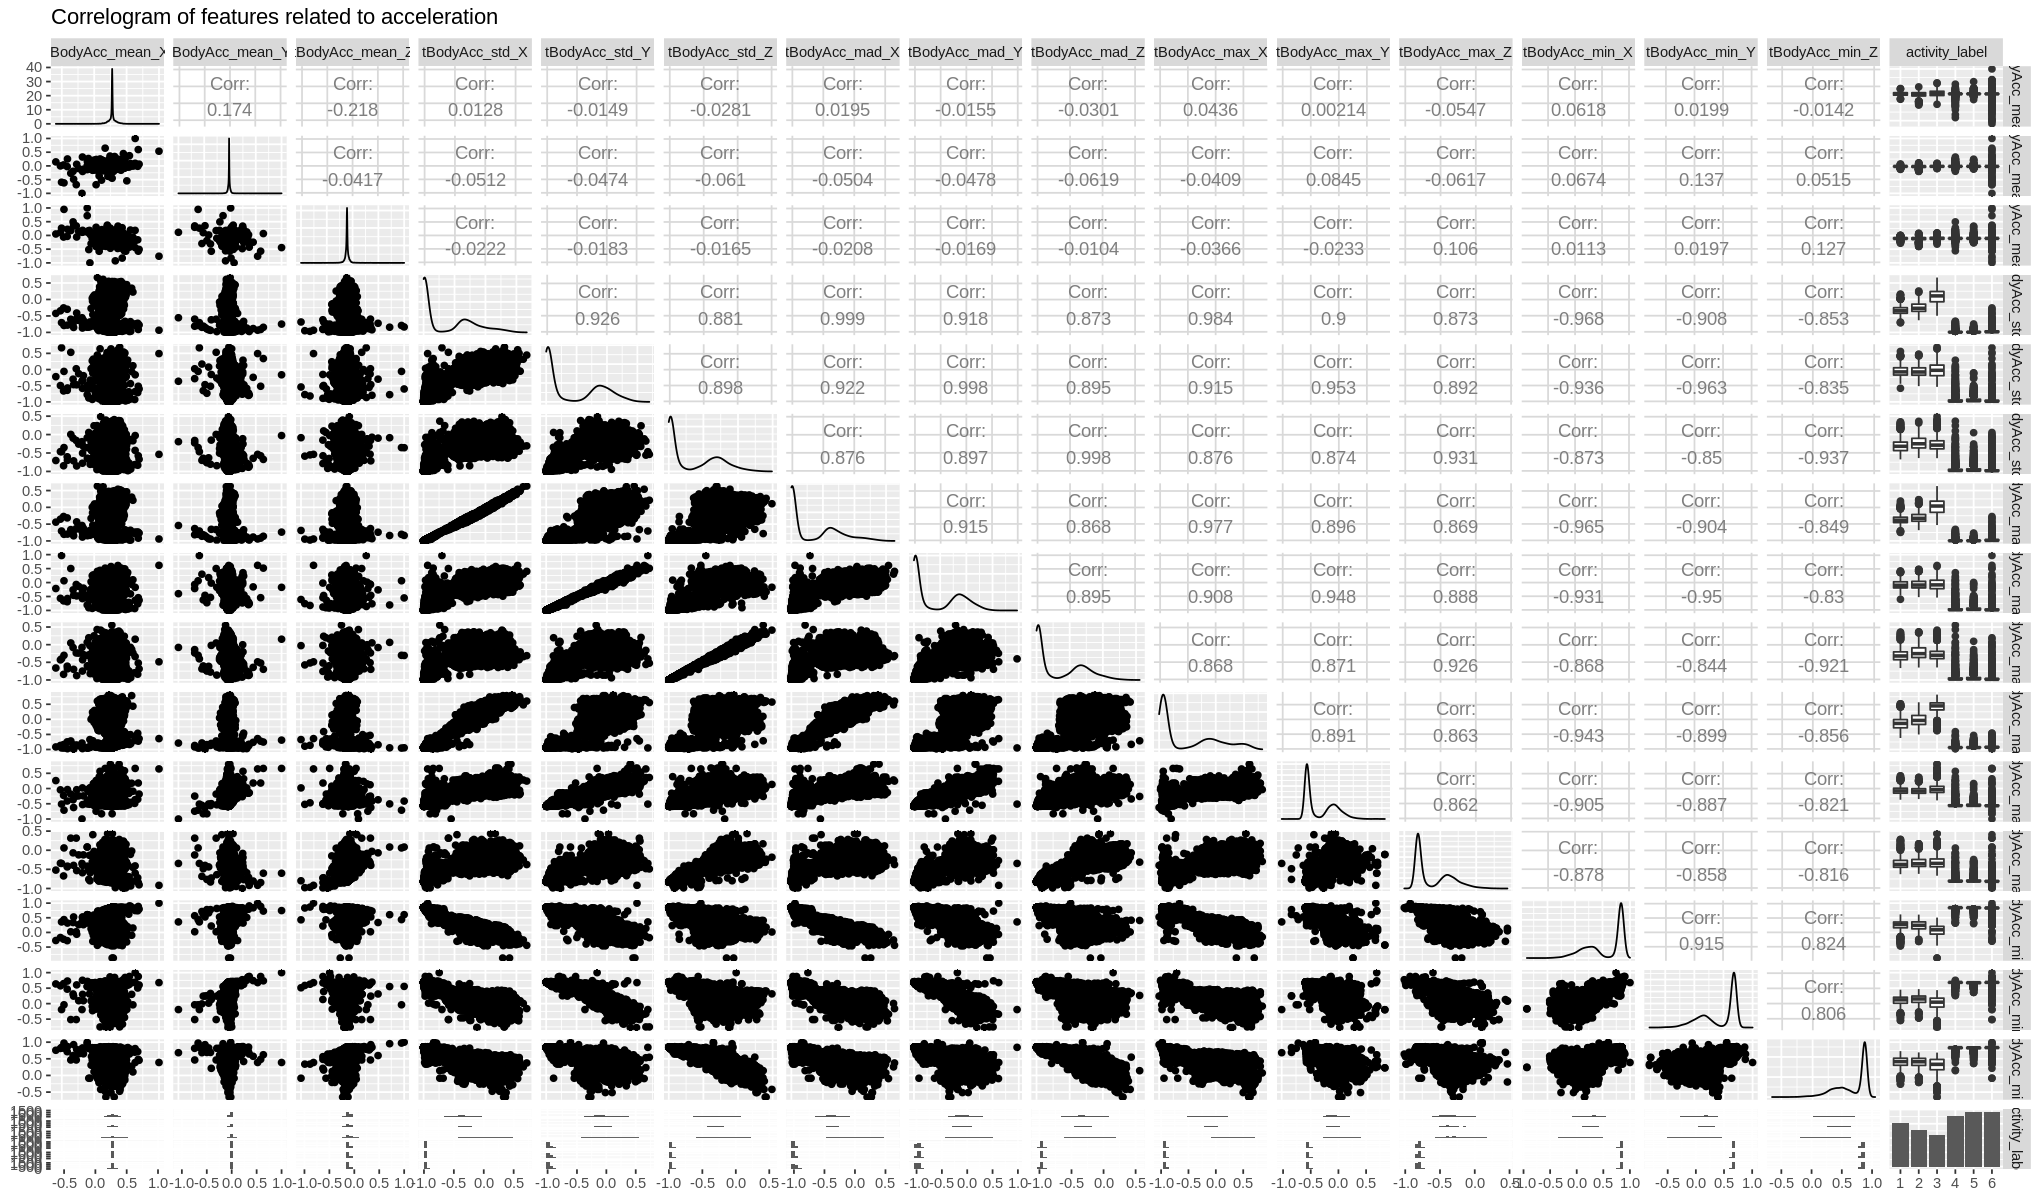

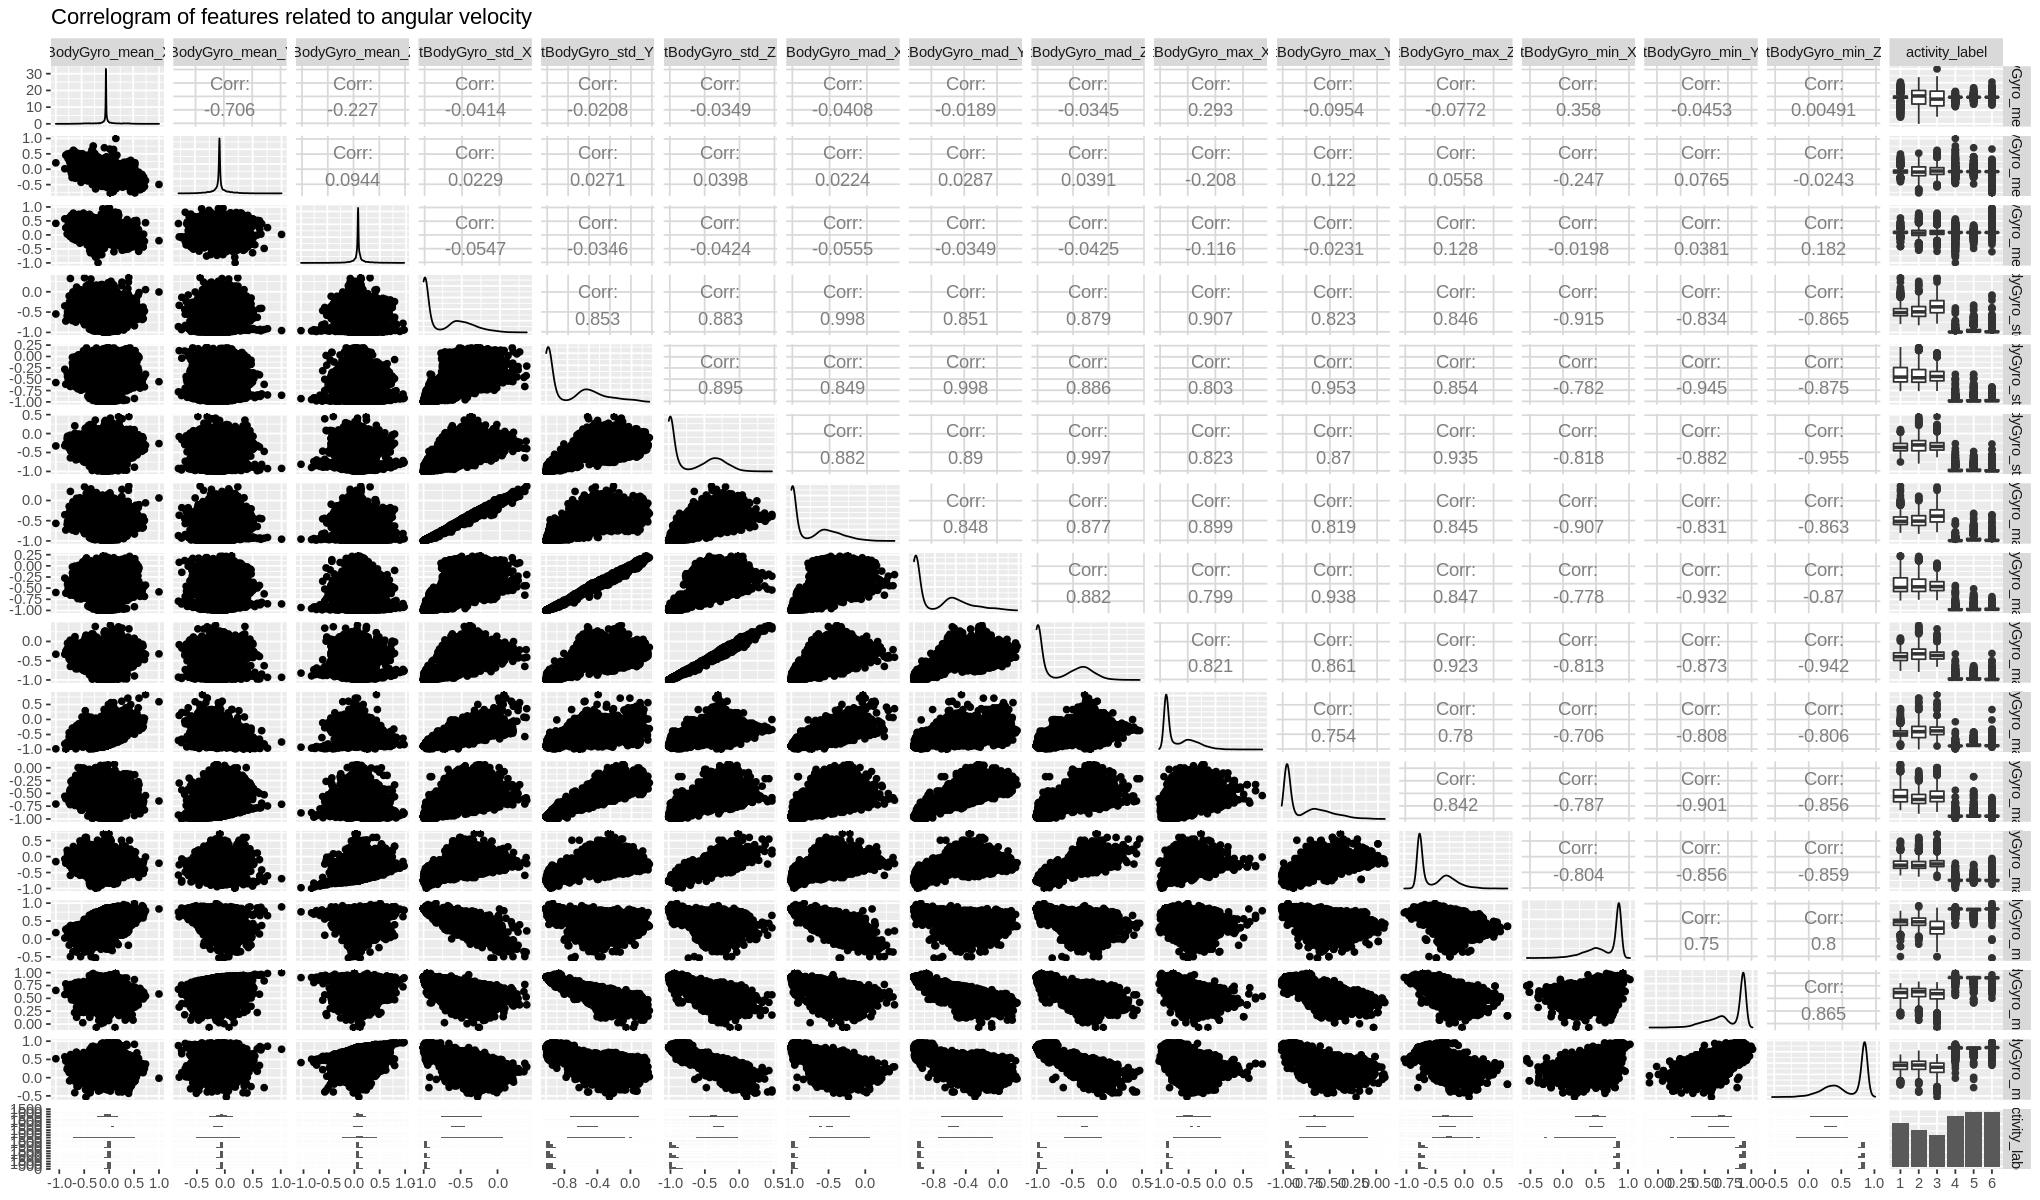

In [80]:
#Correlation graph of features related to acceleration
correlation_acc <- ggpairs(relevant_acc_columns, title ="Correlogram of features related to acceleration")
correlation_acc

#Correlation graph of features related to angular velocity 
correlation_ang <- ggpairs(relevant_ang_columns, title ="Correlogram of features related to angular velocity")
correlation_ang

Since there are too many features available (561), we will select 6 variables that we hypothesize to be relevant. We will focus on a small subset of all the variables instead of looking at all of them. Then we will examine the variables we have picked using visualization and other techniques.

The 12 variables are: 

1. tBodyAcc-mean()-X, 
2. tBodyAcc-mean()-Y,
3. tBodyAcc-mean()-Z, 
4. tBodyGyro-mean()-X, 
5. tBodyGyro-mean()-Y and 
6. tBodyGyro-mean()-Z.

**add the other variables later used for analysis later**

In [13]:
# created a data frame contraining only the 5 variables (from the paper) and the activity labels. 
training_subset <- activity_train %>%
    select(tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X, tBodyAccJerk_energy_X,fBodyAcc_mad_X, activity_label)
  
tail(training_subset)


tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_min_X,tBodyAccJerk_energy_X,fBodyAcc_mad_X,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9017973,-0.2575576,0.9128043,-0.8446461,-0.3235569,2
0.8968500,-0.2736605,0.9068774,-0.8484333,-0.2621446,2
0.8891608,-0.2875003,0.9034133,-0.8680587,-0.3281814,2
0.8909677,-0.2767180,0.9034133,-0.8273045,-0.2405937,2
0.8912809,-0.2749762,0.9037927,-0.7939383,-0.1819376,2
0.8908972,-0.2761645,0.9037927,-0.8110020,-0.3017432,2


### III. Tables

**REVISE THIS LATER WITH UPDATED VARIABLES**

After splitting the dataset into a train and test set, we selected six variables for our analysis:

1. tBodyAcc-mean()-X,
2. tBodyAcc-mean()-Y,
3. tBodyAcc-mean()-Z,
4. tBodyGyro-mean()-X,
5. tBodyGyro-mean()-Y and
6. tBodyGyro-mean()-Z.

We made a table including these variables and calculated the number of rows with missing data - zero. Next, we summarized the training data to inspect the possible scaling and centering; it appears to be already scaled by looking at the min and max values, although we should consider scaling when creating a recipe. Lastly, we calculated the number of observations for each activity to ensure equal proportions to minimize the model’s bias towards one activity.

In [14]:
missing_data <- training_subset %>%
    summarize(missing_data = sum(is.na(training_subset)))

# Table 1: how many rows have missing data
kable(missing_data, caption = "Number of rows with missing data")



Table: Number of rows with missing data

| missing_data|
|------------:|
|            0|

There is no missing data since it was already accounted for when combining the two datasets (train and test set into one)

In [15]:
#Table 2: create summary table of training data
summary(training_subset) 

# We can notice that most of the data has been scaled to have same spread. 
#The min (-1.0000) and max (1.0000) values are still not all the same. 
#Though, they are not centered as each variable do not have a mean of 0.

 tGravityAcc_mean_X tGravityAcc_mean_Y tGravityAcc_min_X tBodyAccJerk_energy_X
 Min.   :-1.0000    Min.   :-0.99982   Min.   :-1.0000   Min.   :-1.0000      
 1st Qu.: 0.8063    1st Qu.:-0.23600   1st Qu.: 0.8111   1st Qu.:-0.9999      
 Median : 0.9236    Median :-0.12840   Median : 0.9315   Median :-0.9993      
 Mean   : 0.6549    Mean   : 0.02106   Mean   : 0.6706   Mean   :-0.8756      
 3rd Qu.: 0.9564    3rd Qu.: 0.17664   3rd Qu.: 0.9690   3rd Qu.:-0.7800      
 Max.   : 1.0000    Max.   : 0.98840   Max.   : 0.9980   Max.   : 0.1908      
 fBodyAcc_mad_X    activity_label
 Min.   :-1.0000   1:1133        
 1st Qu.:-0.9925   2: 970        
 Median :-0.9635   3: 837        
 Mean   :-0.6381   4:1329        
 3rd Qu.:-0.2562   5:1429        
 Max.   : 0.7731   6:1443        

In [16]:
# data frame that has been grouped by each activity data
each_activity_data <- training_subset %>%
    group_by(activity_label)

# Number of observations for each activity
count_activity_data <- summarize(each_activity_data, count = n()) 

# Table 3: how many observations for each activity
kable(count_activity_data, caption = "Number of observations for each activity")

`summarise()` ungrouping output (override with `.groups` argument)





Table: Number of observations for each activity

|activity_label | count|
|:--------------|-----:|
|1              |  1133|
|2              |   970|
|3              |   837|
|4              |  1329|
|5              |  1429|
|6              |  1443|

### IV. Plots

Certain activity types are more concentrated in one area of the scatter plot (body acceleration (m/s^2) vs. angular velocity(rads/s)) suggesting a moderate correlation between the estimated acceleration and angular velocity. Therefore, we expect to see a distinct acceleration and angular velocity for each activity type. This preliminary analysis confirms the validity of using both body acceleration and angular velocity in the (x,y,z) directions as the main predictors.

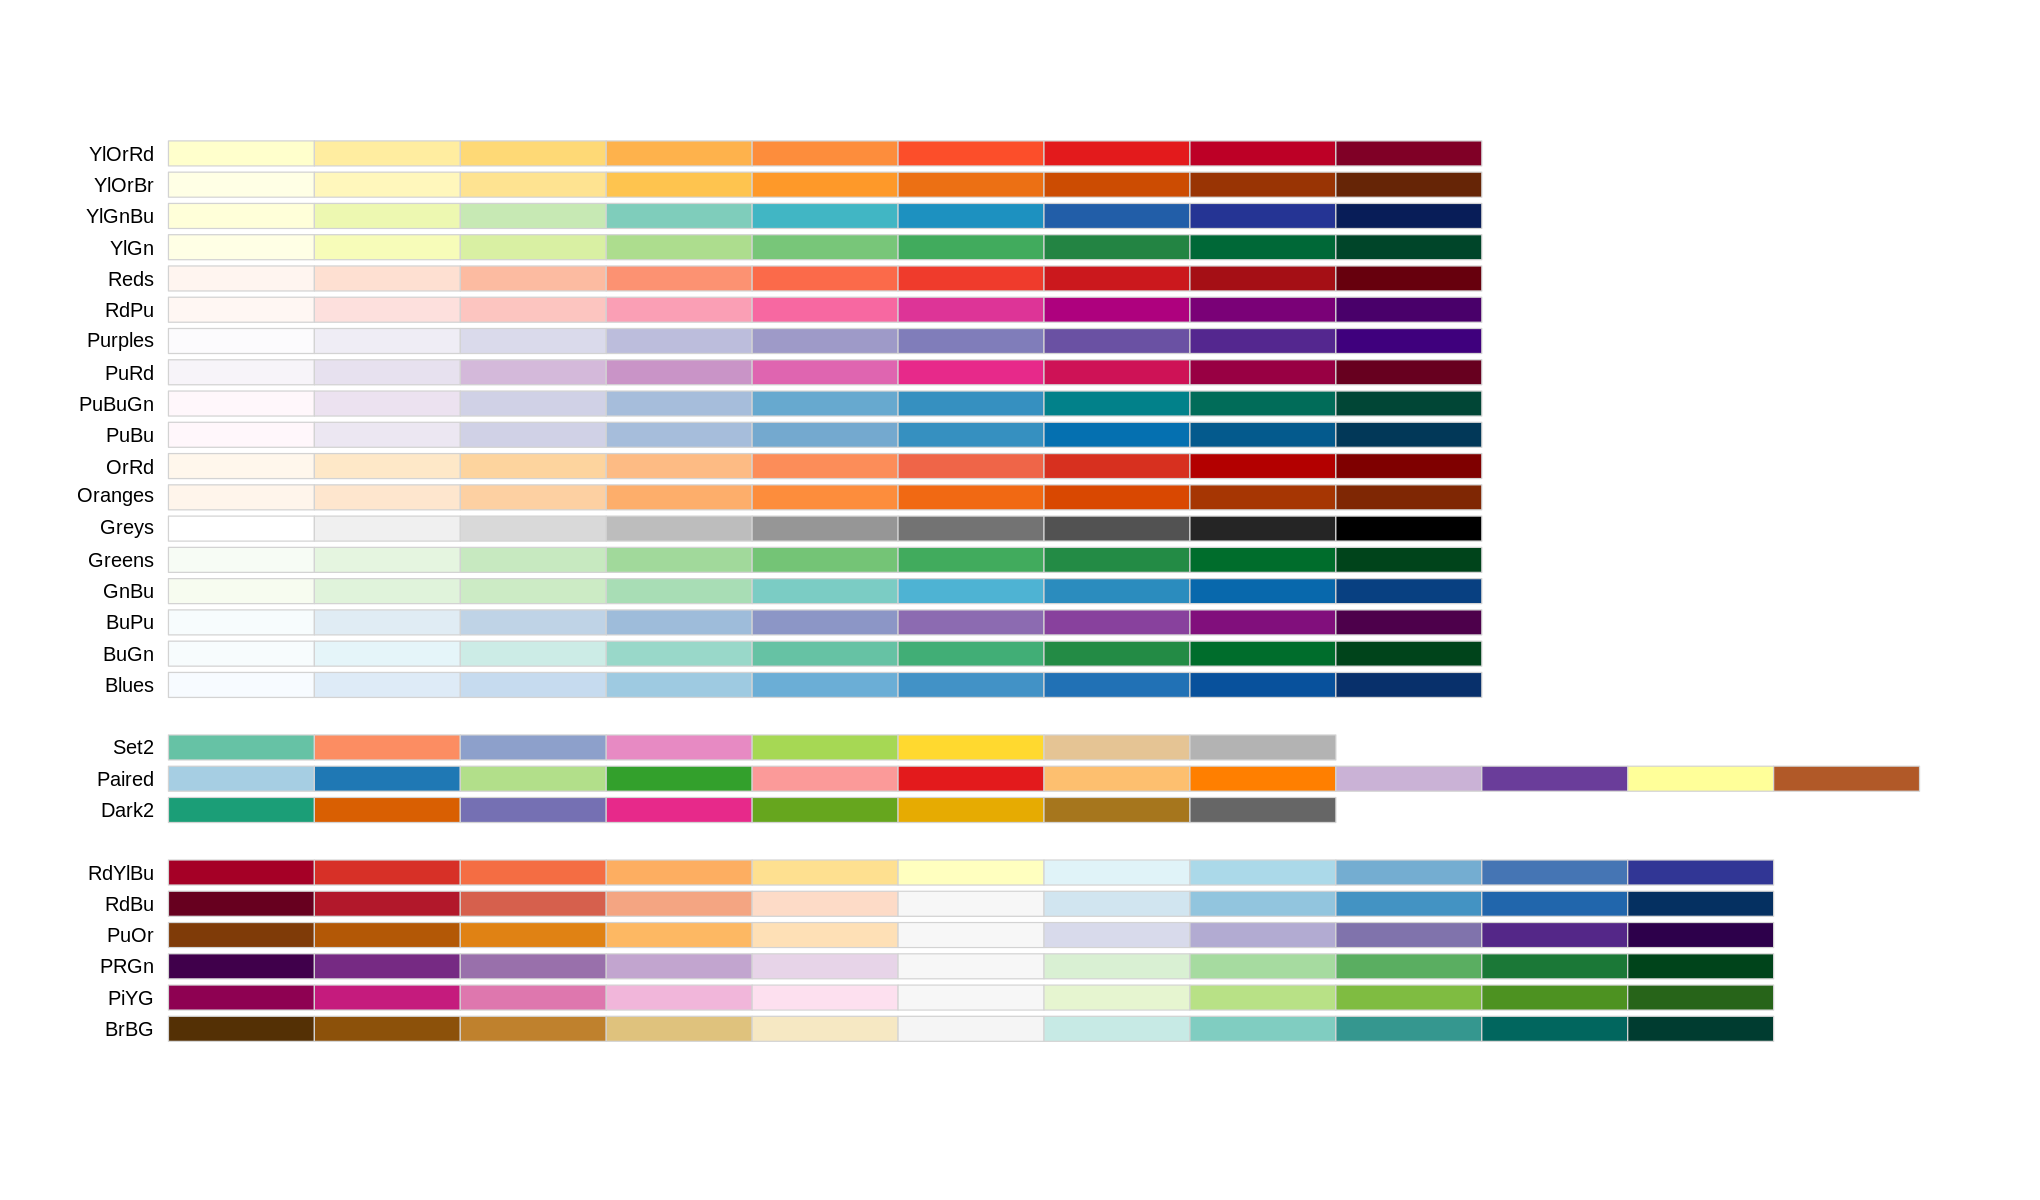

In [17]:
options(repr.plot.width=17, repr.plot.height=10)

# checking colour options to ensure colour blind friendliness of the plots
display.brewer.all(colorblindFriendly = TRUE)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'tBodyAcc_mean_X' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_

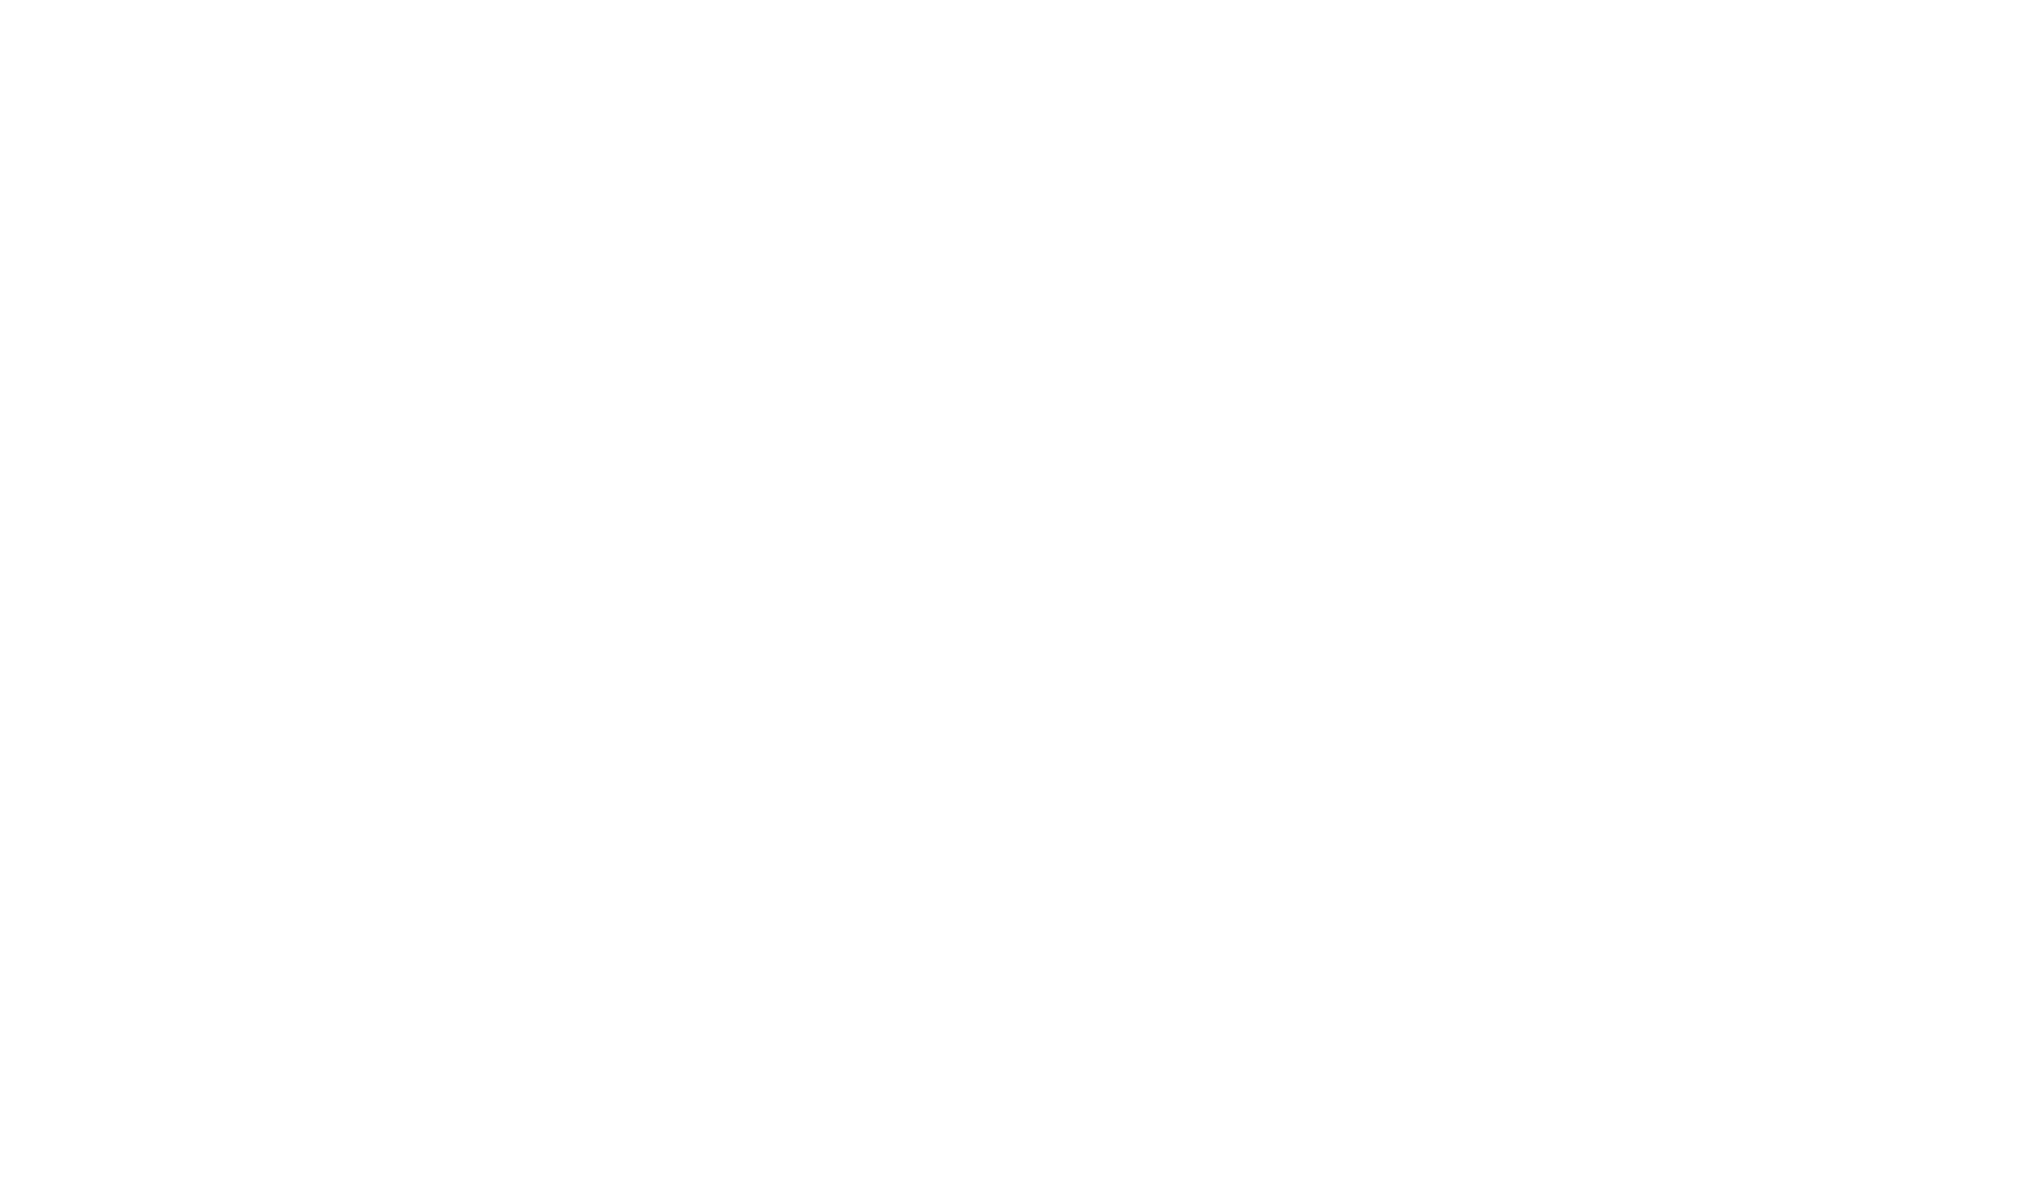

In [18]:
#  Using only training data, compares the distributions of each of the predictor variables 

#Plot 1: Angular Velocity vs. Acceleration of a Body on Dimension X
accl_gyro_x <- training_subset %>%
  ggplot(aes(x = tBodyAcc_mean_X, y = tBodyGyro_mean_X, color = activity_label)) +
  ggtitle("Angular Velocity vs. Acceleration of a Body on Dimension X") +
  geom_point(alpha = 0.4) +
  labs(x = "Acceleration (m/s^2)", y = "Angular Velocity (radians/sec)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=30))

accl_gyro_x

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'tBodyGyro_mean_Y' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare

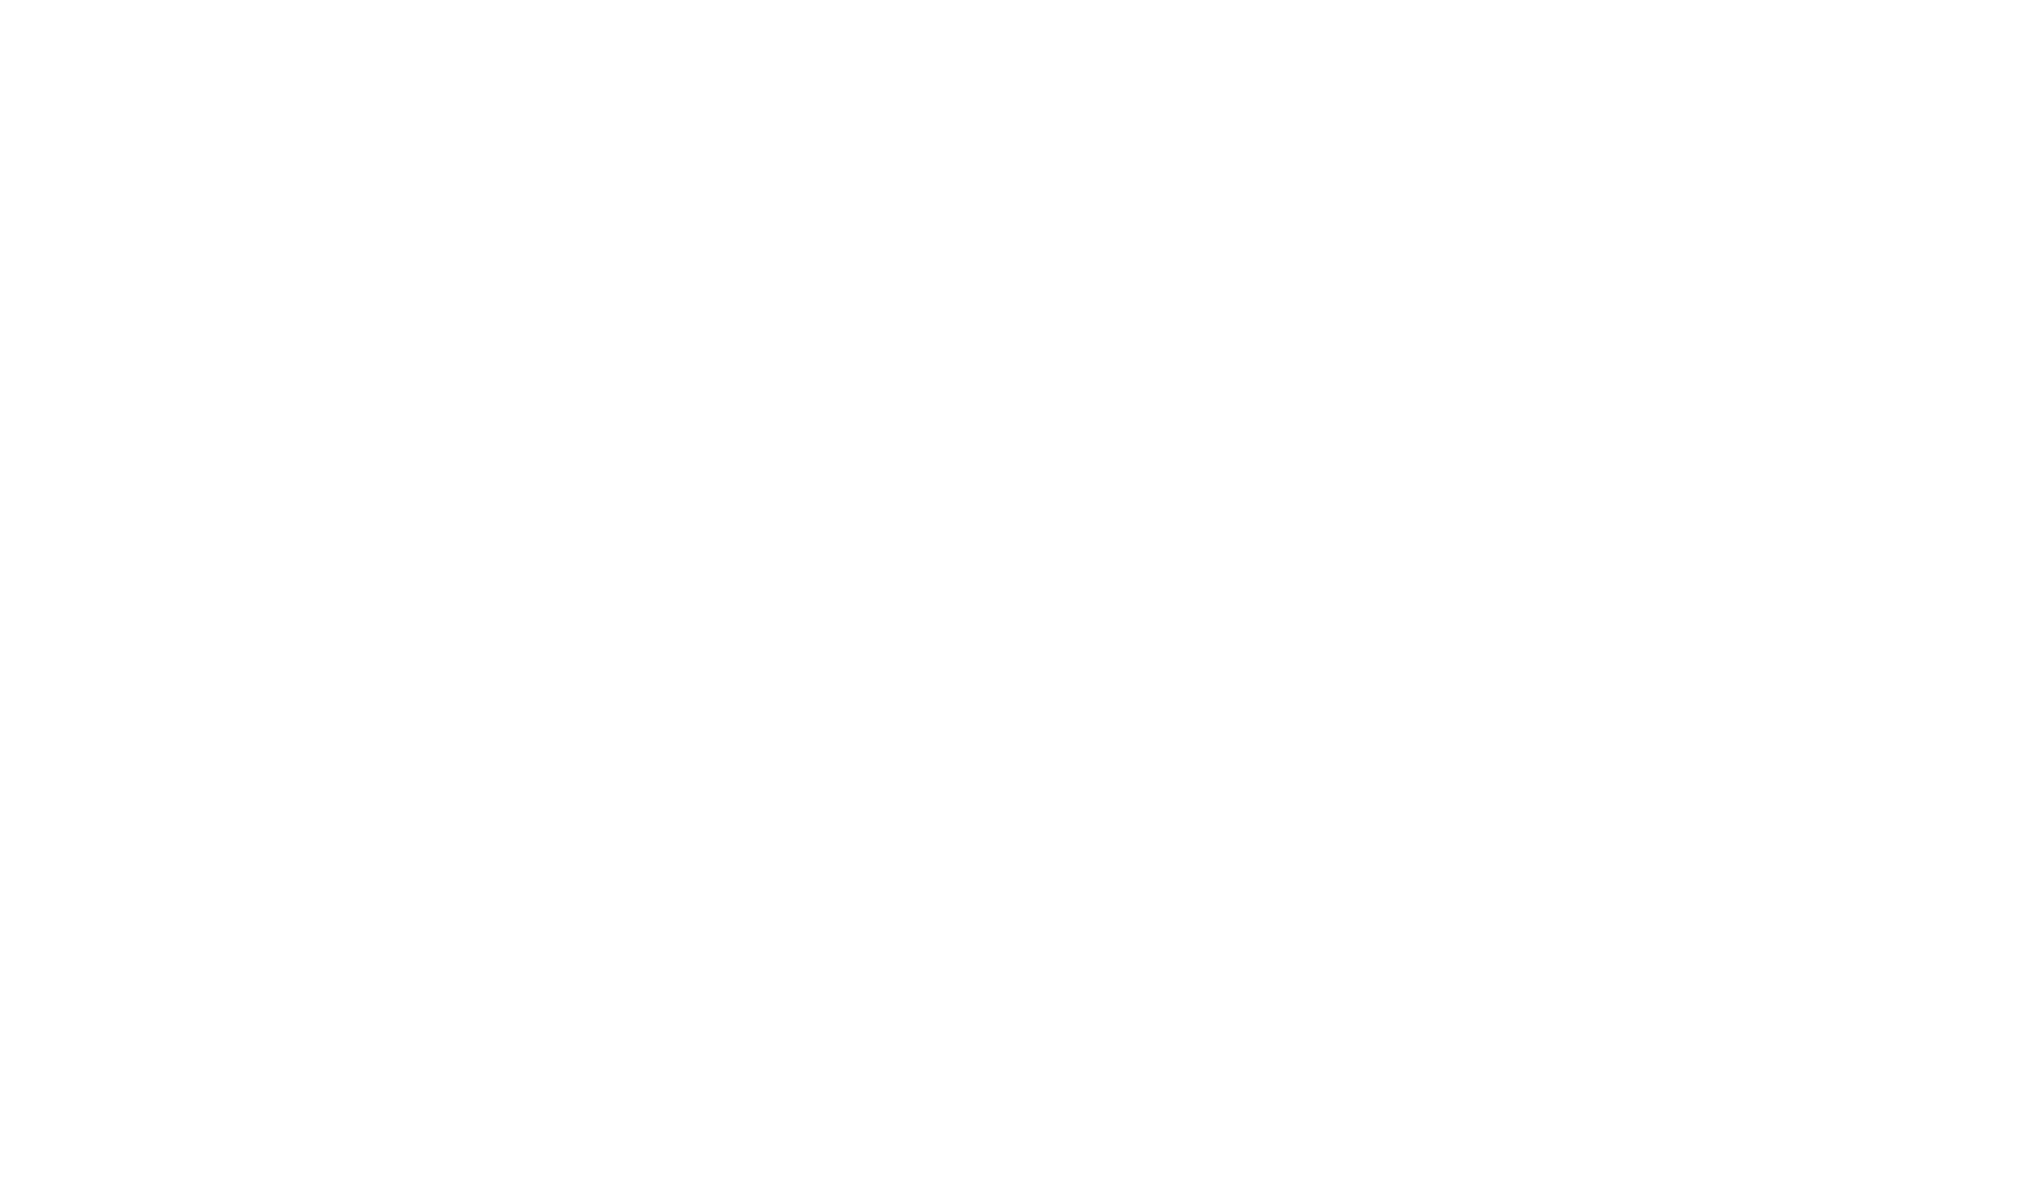

In [19]:
# Plot 2: Angular Velocity vs. Acceleration of a Body on Dimension Y
accl_gyro_y <- training_subset %>%
  ggplot(aes(x = tBodyGyro_mean_Y, y = tBodyAcc_mean_Y, color = activity_label)) +
  ggtitle("Angular Velocity vs. Acceleration of a Body on Dimension Y") +
  geom_point(alpha = 0.4) +
  labs(x = "Acceleration (m/s^2)", y = "Angular Velocity (radians/sec)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=30))

accl_gyro_y

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'tBodyAcc_mean_Z' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_

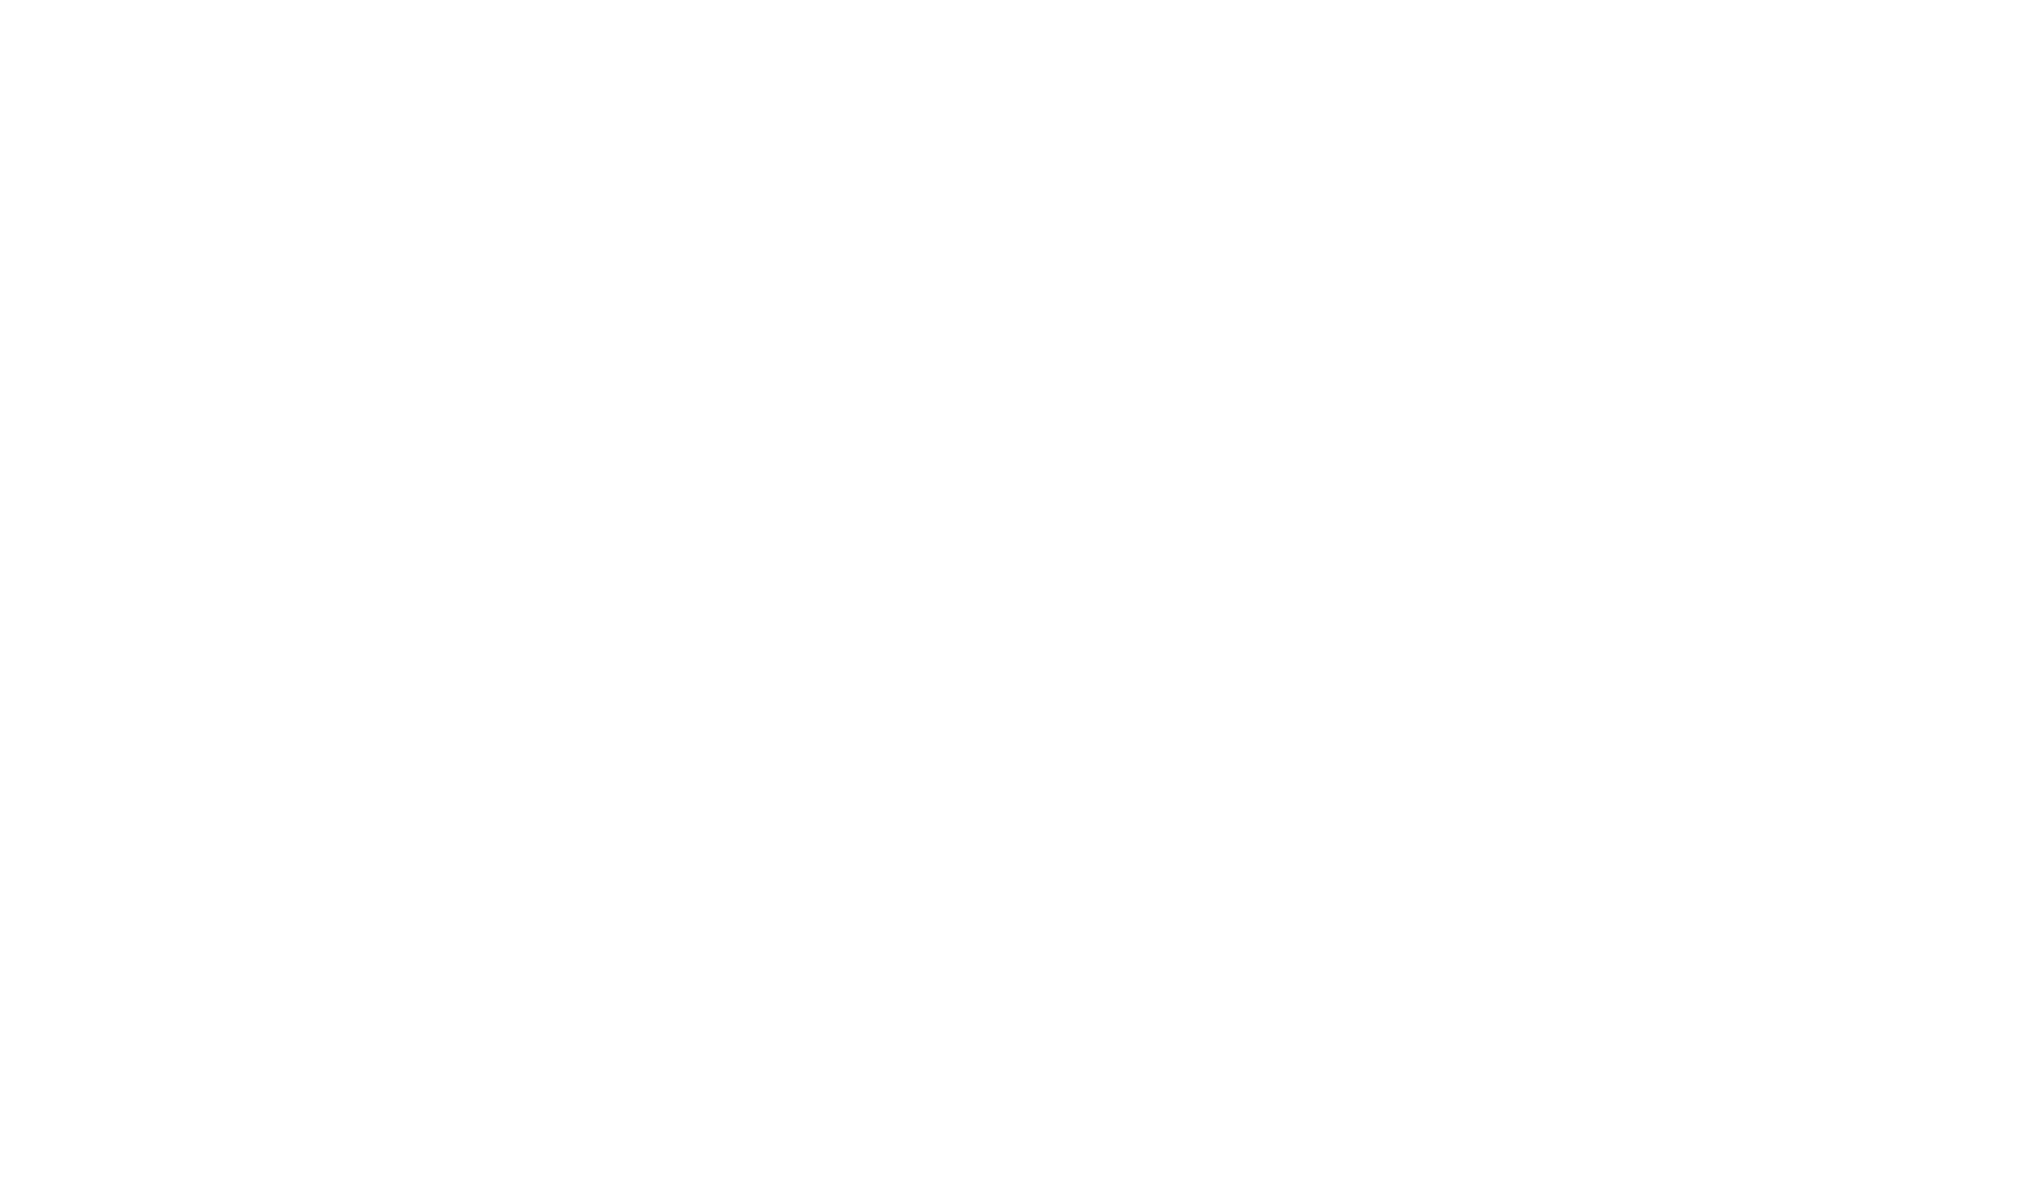

In [20]:
# Plot 3: Angular Velocity vs. Acceleration of a Body on Dimension Z
accl_gyro_z <- training_subset %>%
  ggplot(aes(x = tBodyAcc_mean_Z, y = tBodyGyro_mean_Z, color = activity_label)) +
  ggtitle("Angular Velocity vs. Acceleration of a Body on Dimension Z") +
  geom_point(alpha = 0.5) +
  labs(x = "Acceleration (m/s^2)", y = "Angular Velocity (radians/sec)", color = "Activity Type") +
  scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("1- Walking", "2- Walking Upstairs", "3- Walking Downstairs", "4- Sitting", "5- Standing", "6- Laying")) +
  theme(text = element_text(size = 20), plot.title = element_text(size=30))

accl_gyro_z

### V. Perform Data Analysis

In [21]:
# Activity Labels 
#1 WALKING
#2 WALKING_UPSTAIRS
#3 WALKING_DOWNSTAIRS
#4 SITTING
#5 STANDING
#6 LAYING

#Create KNN model using K = 3
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
knn_spec

#Create recipe (scaling needed with new predictors)
recipe <- recipe(activity_label ~. , data = training_subset) %>% 
  step_center(all_predictors()) %>% 
  step_scale(all_predictors())  
recipe

#Create workflow 
knn_fit <- workflow() %>% 
  add_recipe(recipe) %>% 
  add_model(knn_spec) %>% 
  fit(data = training_subset)
knn_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Centering for all_predictors()
Scaling for all_predictors()

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_center()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1074079
Best kernel: rectangular
Best k: 3

In [22]:
#Prediction 
activity_predictions <- predict(knn_fit, activity_test) %>%
      bind_cols(activity_test)
activity_predictions

.pred_class,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
5,0.2796531,-0.019467156,-0.11346169,-0.9953796,-0.96718701,-0.9789440,-0.9965199,-0.96366837,-0.9774686,⋯,-0.39074815,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002,5
5,0.2794539,-0.019640776,-0.11002215,-0.9969210,-0.96718593,-0.9831178,-0.9970027,-0.96609671,-0.9831163,⋯,-0.21719818,-5.6443048e-001,-2.1275406e-001,-2.3062193e-001,1.4636690e-002,-1.8951153e-001,-8.5215025e-001,1.8216997e-001,-4.3009987e-002,5
5,0.2762282,-0.021441302,-0.10820234,-0.9982460,-0.98721376,-0.9927266,-0.9982513,-0.98599654,-0.9931819,⋯,-0.61101364,-8.7836268e-001,1.7609637e-003,-6.5980273e-002,5.7886112e-001,-6.5194513e-001,-8.5272340e-001,1.8605036e-001,-3.5852089e-002,5
5,0.2771750,-0.014712802,-0.10675647,-0.9991883,-0.99052638,-0.9933650,-0.9992114,-0.99068725,-0.9921675,⋯,-0.56409980,-7.6590135e-001,1.0562047e-001,-9.0277545e-002,-1.3240280e-001,4.9881419e-001,-8.4977267e-001,1.8881220e-001,-3.5063399e-002,5
5,0.2792035,-0.023020143,-0.12208028,-0.9968390,-0.97484812,-0.9833855,-0.9970939,-0.97333193,-0.9840653,⋯,-0.78213651,-9.5352020e-001,-1.2185222e-001,-2.9076714e-002,-1.3034217e-002,-5.6927156e-002,-7.6110079e-001,2.6311858e-001,2.4172110e-002,5
5,0.2756763,-0.021264234,-0.11080122,-0.9978621,-0.99009076,-0.9945926,-0.9983334,-0.98947266,-0.9944845,⋯,-0.70196994,-8.9511812e-001,-3.2337498e-002,-3.0129838e-001,1.3257596e-001,-2.2379316e-002,-7.6150888e-001,2.6255006e-001,2.9639170e-002,5
5,0.2757344,-0.018018840,-0.10677578,-0.9992550,-0.99366888,-0.9941888,-0.9994065,-0.99362014,-0.9935829,⋯,-0.82491892,-9.6440686e-001,2.3106031e-001,4.2928253e-001,6.8115429e-001,8.1522562e-001,-7.6370208e-001,2.6110336e-001,2.8562963e-002,5
4,0.3036893,-0.004242805,-0.15085028,-0.9565033,-0.83867155,-0.9430095,-0.9620059,-0.84482083,-0.9371947,⋯,-0.17681171,-5.4858082e-001,-1.2337932e-002,9.4622460e-002,2.9126625e-002,-1.3424521e-001,-3.0588411e-001,-2.1333904e-001,-3.3700092e-001,4
4,0.2907597,-0.024034760,-0.11673889,-0.9773745,-0.96384053,-0.9625050,-0.9776306,-0.95938205,-0.9622540,⋯,-0.50812728,-8.6266897e-001,9.6193097e-002,-1.3137498e-001,7.7639880e-002,-3.7327157e-002,-3.0919487e-001,-2.2111662e-001,-3.2645795e-001,4


In [23]:
#Classifier's Accuracy 
activity_prediction_accuracy <- activity_predictions %>%
        metrics(truth = activity_label, estimate = .pred_class)  
activity_prediction_accuracy


#Confusion matrix
activity_mat <- activity_predictions %>% 
      conf_mat(truth = activity_label, estimate = .pred_class)
activity_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8990324
kap,multiclass,0.8778746


          Truth
Prediction   1   2   3   4   5   6
         1 334  41  26   0   0   0
         2  22 262  24   0   0   0
         3  21  20 228   0   0   0
         4   0   0   0 397  40   0
         5   0   0   0  46 436   0
         6   0   0   0   0   0 480

In [24]:
#10-fold cross-validation 
activity_vfold <- vfold_cv(training_subset, v = 10, strata = activity_label)

#Perform workflow analysis again 
activity_resample_fit <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(knn_spec) %>%
      fit_resamples(resamples = activity_vfold)

#Accuracy of classifier's validation across the folds
activity_metrics <- activity_resample_fit %>% 
    collect_metrics()
activity_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,multiclass,0.8910416,10,0.003307273
roc_auc,hand_till,0.9649022,10,0.001226661


In [25]:
#Create new K-nearest neighbours model specification to tune K value 
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [26]:
#Create new workflow with recipe and new knn_tune specification 
knn_results <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = activity_vfold, grid = 10) %>%
      collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8913227,10,0.0038024072,Model01
2,roc_auc,hand_till,0.9554485,10,0.0017629488,Model01
3,accuracy,multiclass,0.8910416,10,0.0033072730,Model02
3,roc_auc,hand_till,0.9649022,10,0.0012266606,Model02
5,accuracy,multiclass,0.8904883,10,0.0030376349,Model03
5,roc_auc,hand_till,0.9753627,10,0.0012108576,Model03
6,accuracy,multiclass,0.8913294,10,0.0032779771,Model04
6,roc_auc,hand_till,0.9770044,10,0.0011761068,Model04
7,accuracy,multiclass,0.8885227,10,0.0027368897,Model05


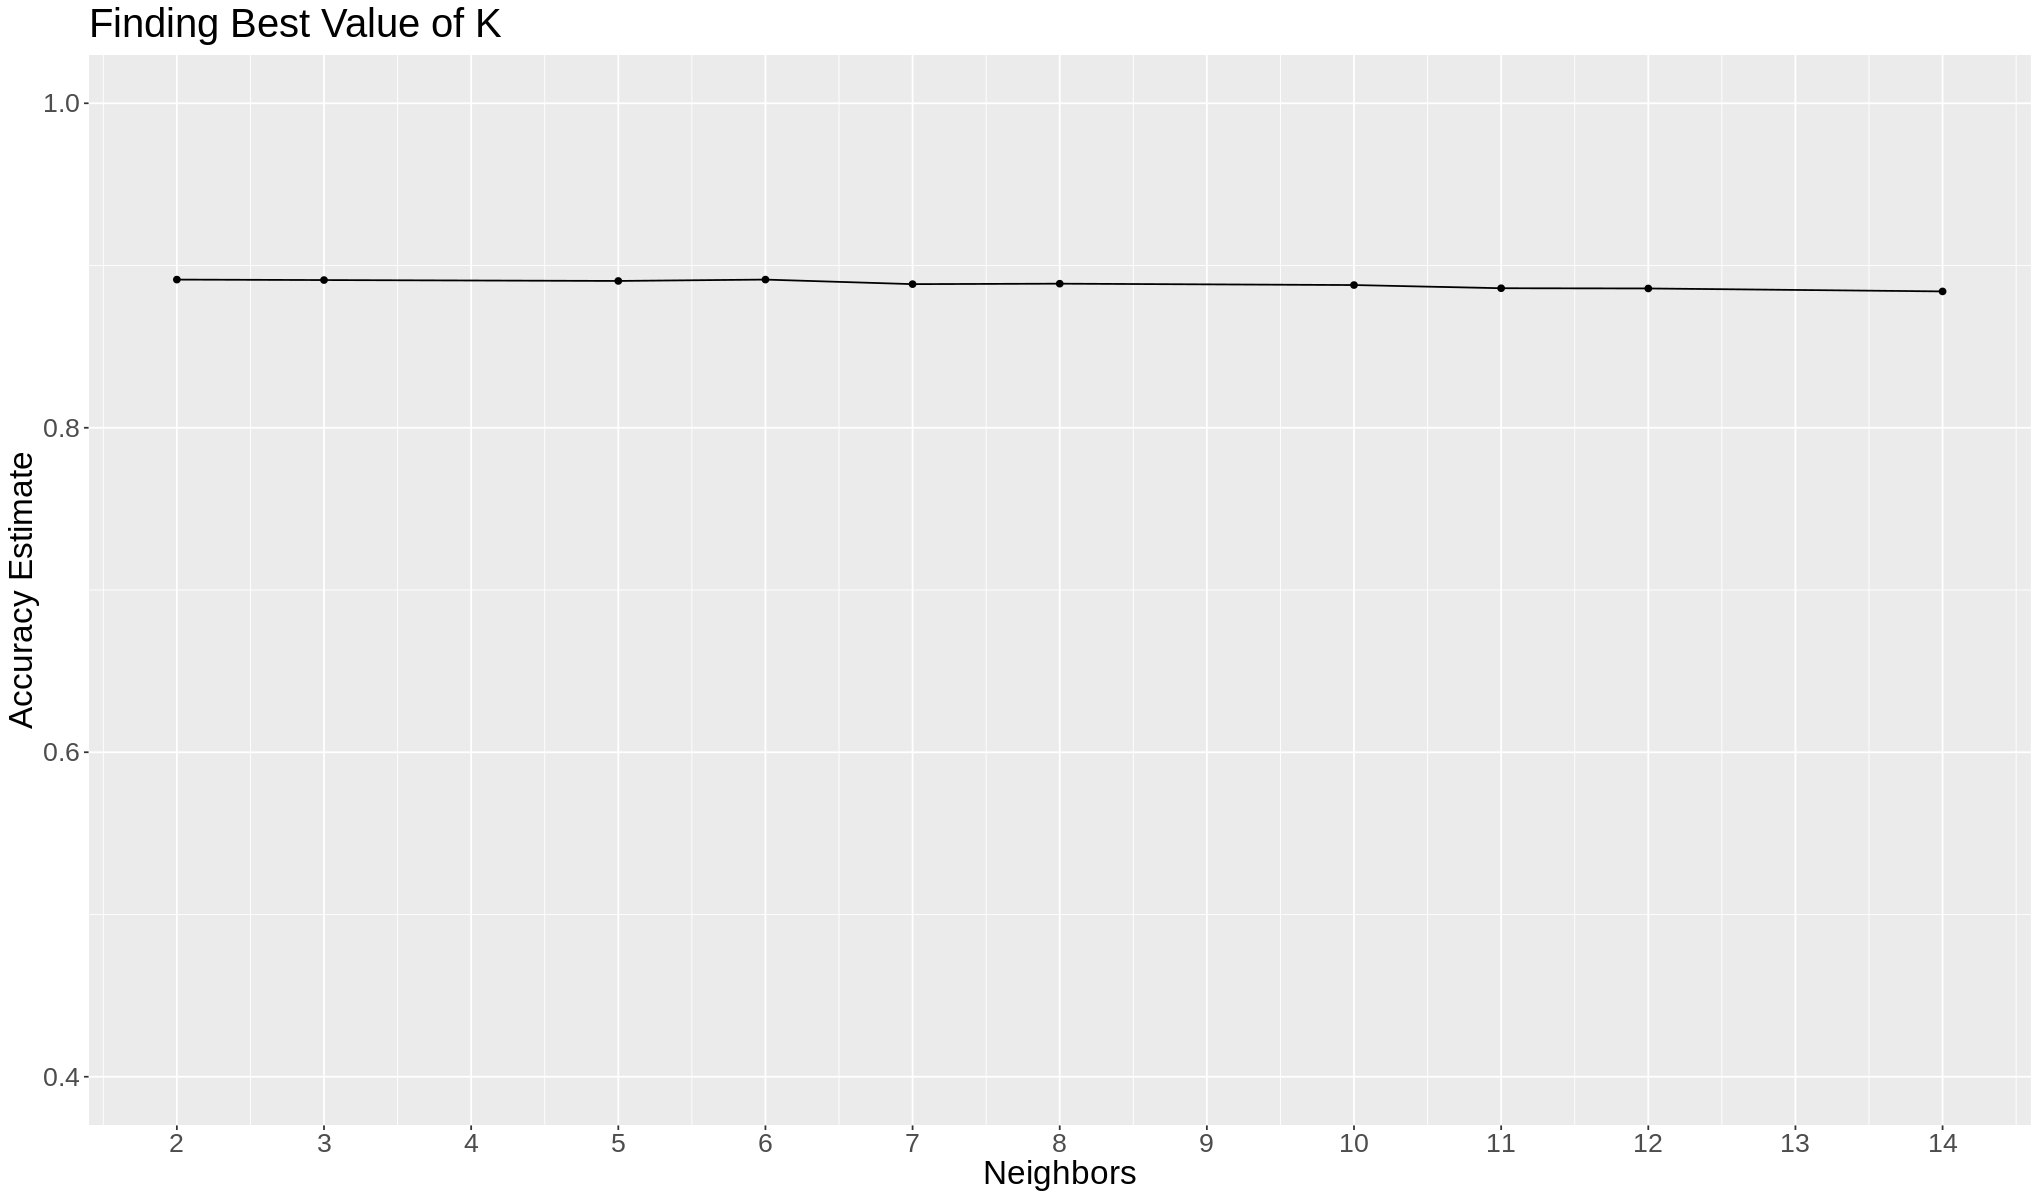

In [27]:
#Find best value of number of neighbours 
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

#Plot mean vs neighbours using accuracies dataset 
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 15, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis 
      theme(text = element_text(size = 20)) +
      ggtitle("Finding Best Value of K")
accuracy_versus_k

In [28]:
#Create new KNN model using K = 6
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")

#Create workflow 
knn_fit <- workflow() %>% 
  add_recipe(recipe) %>% 
  add_model(knn_spec_new) %>% 
  fit(data = training_subset)

#Prediction 
activity_predictions <- predict(knn_fit, activity_test) %>%
      bind_cols(activity_test)
activity_predictions

#Classifier's Accuracy 
activity_prediction_accuracy <- activity_predictions %>%
        metrics(truth = activity_label, estimate = .pred_class)  
activity_prediction_accuracy

#Confusion matrix
activity_mat_new <- activity_predictions %>% 
      conf_mat(truth = activity_label, estimate = .pred_class)
activity_mat_new

.pred_class,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
5,0.2796531,-0.019467156,-0.11346169,-0.9953796,-0.96718701,-0.9789440,-0.9965199,-0.96366837,-0.9774686,⋯,-0.39074815,-7.6010372e-001,-1.1855926e-001,1.7789948e-001,1.0069921e-001,8.0852908e-001,-8.4893347e-001,1.8063731e-001,-4.9117815e-002,5
5,0.2794539,-0.019640776,-0.11002215,-0.9969210,-0.96718593,-0.9831178,-0.9970027,-0.96609671,-0.9831163,⋯,-0.21719818,-5.6443048e-001,-2.1275406e-001,-2.3062193e-001,1.4636690e-002,-1.8951153e-001,-8.5215025e-001,1.8216997e-001,-4.3009987e-002,5
5,0.2762282,-0.021441302,-0.10820234,-0.9982460,-0.98721376,-0.9927266,-0.9982513,-0.98599654,-0.9931819,⋯,-0.61101364,-8.7836268e-001,1.7609637e-003,-6.5980273e-002,5.7886112e-001,-6.5194513e-001,-8.5272340e-001,1.8605036e-001,-3.5852089e-002,5
5,0.2771750,-0.014712802,-0.10675647,-0.9991883,-0.99052638,-0.9933650,-0.9992114,-0.99068725,-0.9921675,⋯,-0.56409980,-7.6590135e-001,1.0562047e-001,-9.0277545e-002,-1.3240280e-001,4.9881419e-001,-8.4977267e-001,1.8881220e-001,-3.5063399e-002,5
5,0.2792035,-0.023020143,-0.12208028,-0.9968390,-0.97484812,-0.9833855,-0.9970939,-0.97333193,-0.9840653,⋯,-0.78213651,-9.5352020e-001,-1.2185222e-001,-2.9076714e-002,-1.3034217e-002,-5.6927156e-002,-7.6110079e-001,2.6311858e-001,2.4172110e-002,5
5,0.2756763,-0.021264234,-0.11080122,-0.9978621,-0.99009076,-0.9945926,-0.9983334,-0.98947266,-0.9944845,⋯,-0.70196994,-8.9511812e-001,-3.2337498e-002,-3.0129838e-001,1.3257596e-001,-2.2379316e-002,-7.6150888e-001,2.6255006e-001,2.9639170e-002,5
5,0.2757344,-0.018018840,-0.10677578,-0.9992550,-0.99366888,-0.9941888,-0.9994065,-0.99362014,-0.9935829,⋯,-0.82491892,-9.6440686e-001,2.3106031e-001,4.2928253e-001,6.8115429e-001,8.1522562e-001,-7.6370208e-001,2.6110336e-001,2.8562963e-002,5
4,0.3036893,-0.004242805,-0.15085028,-0.9565033,-0.83867155,-0.9430095,-0.9620059,-0.84482083,-0.9371947,⋯,-0.17681171,-5.4858082e-001,-1.2337932e-002,9.4622460e-002,2.9126625e-002,-1.3424521e-001,-3.0588411e-001,-2.1333904e-001,-3.3700092e-001,4
4,0.2907597,-0.024034760,-0.11673889,-0.9773745,-0.96384053,-0.9625050,-0.9776306,-0.95938205,-0.9622540,⋯,-0.50812728,-8.6266897e-001,9.6193097e-002,-1.3137498e-001,7.7639880e-002,-3.7327157e-002,-3.0919487e-001,-2.2111662e-001,-3.2645795e-001,4


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8994531
kap,multiclass,0.8783661


          Truth
Prediction   1   2   3   4   5   6
         1 338  42  28   0   0   0
         2  20 264  19   0   0   0
         3  19  17 231   0   0   0
         4   0   0   0 390  41   0
         5   0   0   0  53 435   0
         6   0   0   0   0   0 480